# Coffee Quality Visualizations

[Import Data](#import)  
[Prepare Data](#prepare)  

## Import Packages and Data <a id='import'></a> 

In [410]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [411]:
# Import Data
coffee = pd.read_excel('/Users/kellyshreeve/Desktop/Data-Sets/df_arabica_clean.xlsx', header=0, index_col=0)

In [412]:
# Print data info 
print(coffee.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     207 non-null    int64  
 1   Country of Origin      207 non-null    object 
 2   Farm Name              205 non-null    object 
 3   Lot Number             206 non-null    object 
 4   Mill                   204 non-null    object 
 5   ICO Number             75 non-null     object 
 6   Company                207 non-null    object 
 7   Altitude               206 non-null    object 
 8   Region                 205 non-null    object 
 9   Producer               206 non-null    object 
 10  Number of Bags         207 non-null    int64  
 11  Bag Weight             207 non-null    object 
 12  In-Country Partner     207 non-null    object 
 13  Harvest Year           207 non-null    object 
 14  Grading Date           207 non-null    object 
 15  Owner 

In [413]:
# Print data head
print(coffee.head(10).to_string())

   ID             Country of Origin                                                 Farm Name                               Lot Number                           Mill                         ICO Number                   Company   Altitude                Region                      Producer  Number of Bags Bag Weight                              In-Country Partner Harvest Year          Grading Date                                           Owner      Variety     Status        Processing Method  Aroma  Flavor  Aftertaste  Acidity  Body  Balance  Uniformity  Clean Cup  Sweetness  Overall  Defects  Total Cup Points  Moisture Percentage  Category One Defects  Quakers         Color  Category Two Defects            Expiration                              Certification Body                                                                                         Certification Address                                Certification Contact
0   0                      Colombia                          

### Import Data Conclusions

Most variables have complete information. Missing a small number of observations are: Farm Name, Lot Number, Mill, Altitute, Region, Producer, Variety, and Processing Method. ICO Number is missing a large number of observations and only present for 75 of the rows. Altitude, Bag Weight, and Harvest Year can be changed to integer data type, Grading Date and Expiration can be changed to datetime. Column names need to be converted to snake case.

## Prepare Data <a id='prepare'></a>

Column names are converted to snake case, missing values are explored and imputed, data types are addressed, and duplicates are explored.

### Column Names

In [414]:
# Convert column names to snake case
coffee.columns = coffee.columns.str.lower().str.replace(' ', '_')


print(coffee.columns)

Index(['id', 'country_of_origin', 'farm_name', 'lot_number', 'mill',
       'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'in-country_partner', 'harvest_year',
       'grading_date', 'owner', 'variety', 'status', 'processing_method',
       'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance',
       'uniformity', 'clean_cup', 'sweetness', 'overall', 'defects',
       'total_cup_points', 'moisture_percentage', 'category_one_defects',
       'quakers', 'color', 'category_two_defects', 'expiration',
       'certification_body', 'certification_address', 'certification_contact'],
      dtype='object')


### Missing Values

In [415]:
# Display number missing in each column
missing_values = coffee.isna().sum()

display(missing_values)

id                         0
country_of_origin          0
farm_name                  2
lot_number                 1
mill                       3
ico_number               132
company                    0
altitude                   1
region                     2
producer                   1
number_of_bags             0
bag_weight                 0
in-country_partner         0
harvest_year               0
grading_date               0
owner                      0
variety                    6
status                     0
processing_method          5
aroma                      0
flavor                     0
aftertaste                 0
acidity                    0
body                       0
balance                    0
uniformity                 0
clean_cup                  0
sweetness                  0
overall                    0
defects                    0
total_cup_points           0
moisture_percentage        0
category_one_defects       0
quakers                    0
color         

There are only a small number of missing values, and they fall largely in columns with string data type. The missing strings will be replaced with 'unknown'. The one misisng altitude value will be dropped from the dataset.

In [416]:
# Replace all missing string values with 'unknown'
str_cols = ['farm_name', 'lot_number', 'mill', 'ico_number', 'region', 'producer', 'variety', 'processing_method']

for col in str_cols:
    coffee[col] = coffee[col].fillna('unknown')
    
# Drop row with missing altitude
coffee = coffee.dropna()

In [417]:
# Re-pring missing values
missing_values_new = coffee.isna().sum()

display(missing_values_new)

id                       0
country_of_origin        0
farm_name                0
lot_number               0
mill                     0
ico_number               0
company                  0
altitude                 0
region                   0
producer                 0
number_of_bags           0
bag_weight               0
in-country_partner       0
harvest_year             0
grading_date             0
owner                    0
variety                  0
status                   0
processing_method        0
aroma                    0
flavor                   0
aftertaste               0
acidity                  0
body                     0
balance                  0
uniformity               0
clean_cup                0
sweetness                0
overall                  0
defects                  0
total_cup_points         0
moisture_percentage      0
category_one_defects     0
quakers                  0
color                    0
category_two_defects     0
expiration               0
c

All missing values have been filled or dropped from the dataset.

### Data Types


Harvest year and altitude are numeric variables that have been loaded as strings because some cells contain ranges of values. To address this issue in harvest year, ranges are replaced with the oldest year listed and converted to integer data type. For altitude, ranges are replaced with the average of the two values and converted to float data type. While bag weight, grading date, and expiration were also not loaded with correct data types, they are not used in this analysis, and their data types will be left as is.

#### Harvest Year

In [418]:
# Examine harvest year values
print(coffee['harvest_year'].unique())

['2021 / 2022' 2022 '2022 / 2023' 2021 '2017 / 2018' '2018 / 2019' 2023]


In [419]:
# Replace year ranges with older year and convert to integer
coffee['harvest_year'] = coffee['harvest_year'].astype(str).str[0:4].astype(int)

print(f"Unique Values: {coffee['harvest_year'].unique()}")

display(coffee[['harvest_year']])

Unique Values: [2021 2022 2017 2018 2023]


,harvest_year
0,2021
1,2021
2,2021
3,2022
4,2022
...,...
202,2022
203,2022
204,2021
205,2023


#### Altitude

In [420]:
# Examine altitude values
print(coffee['altitude'].unique())

['1700-1930' 1200 1300 1900 '1850-2100' 1668 1250 '1400-1700' '1800-2200'
 2000 '1900-2000' 1850 1100 '1900-2100' '1570-1600' 850 '1500-1700' 1350
 1060 600 '150-250' 668 1950 '2150 - 2350' 1700 650 '1600-1900' '300-500'
 1000 800 1905 150 1600 4700 '350-400' 230 1750 1654 1400 4895 '200-300'
 700 1450 520 1368 1943 400 '1300-1400' 2361 1500 2100 '1250-1350'
 '1500-1600' 1800 '1600-1750' 1411 '4895 A 5650' '400-600' '200-400' 1470
 '250-400' '250-300' '1200 - 1580' '1400 - 1900' '1280-1325' 300 750
 '1300-1500' 950 '1100-1200' 1390 340 '1200 - 1300' 1650 1280 900 165 465
 640 1340 139 '1200-1350' 1040 140 '1500-1950' 460 500 '800-1200'
 '1350-1550' '1200~1600' 5400 '900-1000' 1574 435 '600-800' '1300-1800'
 '850-1100']


In [421]:
# Replace all dash characters with regular dash '-'
coffee['altitude_mean'] = coffee['altitude'].str.replace('~', '-').str.replace(' ', '').str.replace('A', '-')

# Split range altitudes by dash into two columns and calculate mean of the two values
coffee['altitude_mean'] = coffee['altitude_mean'].str.split('-', expand=True).astype('float64').mean(axis=1)

# Fill rows that didn't have a range range back in with their singular altitude values
coffee['altitude_mean'] = coffee['altitude_mean'].fillna(coffee['altitude'])

# Extract data type
altitude_mean_dtype = coffee['altitude_mean'].dtype

# Print result
print(f'Altitude Mean Data Type: {altitude_mean_dtype}')
print()
display(coffee[['altitude', 'altitude_mean']])


Altitude Mean Data Type: float64



,altitude,altitude_mean
0,1700-1930,1815.0
1,1200,1200.0
2,1300,1300.0
3,1900,1900.0
4,1850-2100,1975.0
...,...,...
202,950,950.0
203,1200,1200.0
204,1300,1300.0
205,1200,1200.0


### Duplicates

Data is checked for full duplicates and implicit duplicates in color and country name.

#### Full Duplicates

In [422]:
# Check for full duplicates
duplicates = coffee.duplicated().sum()

print(f'The number of full duplicates is: {duplicates}')

The number of full duplicates is: 0


There are no full duplicates in the dataset.

#### Color Duplicates

In [423]:
# Check for implicit duplicates in color
print(coffee['color'].unique())


['green' 'blue-green' 'yellowish' 'yellow-green' 'yellow green' 'greenish'
 'brownish' 'yellow- green' 'browish-green' 'bluish-green' 'pale yellow'
 'yello-green']


In [424]:
# Replace all yellow-green options with 'yellow-green'
yellow_greens = ['yellow green', 'yellow- green', 'yello-green']

for yellow in yellow_greens:
    coffee['color'] = coffee['color'].replace(yellow, 'yellow-green')
    
# Replace all blue-green options with 'blue-green'
coffee['color'] = coffee['color'].replace('bluish-green', 'blue-green')

# Replace all yellow options with 'pale-yellow'
coffee['color'] = coffee['color'].replace(['yellowish', 'pale yellow'], 'pale-yellow')

# Replace greenish with 'green'
coffee['color'] = coffee['color'].replace('greenish', 'green')

# Replace browns with 'brown'
coffee['color'] = coffee['color'].replace(['brownish', 'browish-green'], 'brown')
    
print(f"Unique Color Values: {coffee['color'].unique()}")
print()
print('Frequencies of Colors:')
print(coffee['color'].value_counts())

Unique Color Values: ['green' 'blue-green' 'pale-yellow' 'yellow-green' 'brown']

Frequencies of Colors:
green           136
blue-green       33
yellow-green     17
pale-yellow      10
brown            10
Name: color, dtype: int64


Color categories are combined and categories each have reasonable numbers of values.

#### Country Duplicates

In [425]:
# Check for implicit duplicates in country of origin
sorted(coffee['country_of_origin'].unique())

['Brazil',
 'Colombia',
 'Costa Rica',
 'El Salvador',
 'Ethiopia',
 'Guatemala',
 'Honduras',
 'Indonesia',
 'Kenya',
 'Laos',
 'Madagascar',
 'Mexico',
 'Myanmar',
 'Nicaragua',
 'Panama',
 'Peru',
 'Taiwan',
 'Tanzania, United Republic Of',
 'Thailand',
 'Uganda',
 'United States (Hawaii)',
 'Vietnam']

In [426]:
# Shorten Tanzania, United Republic of to 'Tanzania'
coffee['country_of_origin'] = coffee['country_of_origin'].replace(
    'Tanzania, United Republic Of', 'Tanzania')

coffee['country_of_origin'].value_counts()

Taiwan                    61
Guatemala                 21
Colombia                  18
Honduras                  13
Thailand                  12
Ethiopia                  11
Brazil                    10
Costa Rica                 8
Nicaragua                  7
El Salvador                7
Tanzania                   6
United States (Hawaii)     5
Mexico                     4
Peru                       4
Vietnam                    4
Uganda                     3
Indonesia                  3
Laos                       3
Panama                     2
Kenya                      2
Madagascar                 1
Myanmar                    1
Name: country_of_origin, dtype: int64

Tanzania has been shorted to 'Tanzania'. There are no other implicit country duplicates.

### Prepare Data Conclusions

Column names are changed to snake case, missing values are addressed, data types have been fixed, and the data has been check for full and implicit duplicates. The data is clean, prepared, and ready for analysis.

## Univariate Visualizations

Variables are plotted individually as an initial exploratory analysis of their individual distributions. Country of origin and color are plotted with bar graphs, and harvest year, altitude, and coffee quality are plotted with histograms. Individual observations will be eliminated from the analysis if outliers are discovered and variables will be eliminated from the analysis if shown to have no variation.

In [450]:
# Bar plot of country of origin
country = px.histogram(coffee, x='country_of_origin', title='Number of Coffee Batches by Country',
                       labels={'count':'Number of Batches', 'country_of_origin':'Country of Origin'}, 
                       width=1000, height=600, text_auto=True)

country.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

country.update_layout(xaxis={'categoryorder':'total descending'})
color.update_layout(yaxis_title='Number of Batches')

country.show()

In [452]:
# Bar plot of color
color = px.histogram(coffee, x='color', title='Number of Coffee Batches by Color',
                     labels={'color':'Color'}, width=1000, height=600, text_auto=True)

color.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

color.update_layout(xaxis={'categoryorder':'total descending'})
color.update_layout(yaxis_title='Number of Batches')

color.show()

In [458]:
# Plot histogram for harvest year
date = px.histogram(coffee, x='harvest_year', title='Number of Coffee Batches by Harvest Year',
                     labels={'harvest_year':'Harvest Year'}, width=1000, height=600,
                     text_auto=True)

date.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

date.update_layout(yaxis_title='Number of Batches')

date.show()

In [466]:
# Remove observations with harvest year before 2021
coffee = coffee[coffee['harvest_year'] > 2020]

date_updated = px.histogram(coffee, x='harvest_year', title='Number of Coffee Batches by Harvest Year',
                     labels={'harvest_year':'Harvest Year'}, width=1000, height=600, 
                     text_auto=True)

date_updated.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

date_updated.update_layout(yaxis_title='Number of Batches')
date_updated.update_xaxes(nticks=4)

date_updated.show()

In [455]:
# Plot histogram for altitude
alt = px.histogram(coffee, x='altitude_mean', title='Number of Coffee Batches by Altitude',
                     labels={'altitude_mean':'Altitude'}, width=1000, height=600, text_auto=True)

alt.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

alt.update_layout(yaxis_title='Number of Batches')

alt.show()

In [456]:
# Remove observations with altitude greater than 4000 
coffee = coffee[coffee['altitude_mean'] < 4000]

alt_updated = px.histogram(coffee, x='altitude_mean', title='Number of Coffee Batches by Altitude',
                     labels={'altitude_mean':'Altitude'}, width=1000, height=600,text_auto=True)

alt_updated.update_layout({
    'plot_bgcolor':'rgba(0, 0, 0, 0)',
    'paper_bgcolor':'rgba(0, 0, 0, 0)'
})

alt_updated.update_layout(yaxis_title='Number of Batches')

alt_updated.show()

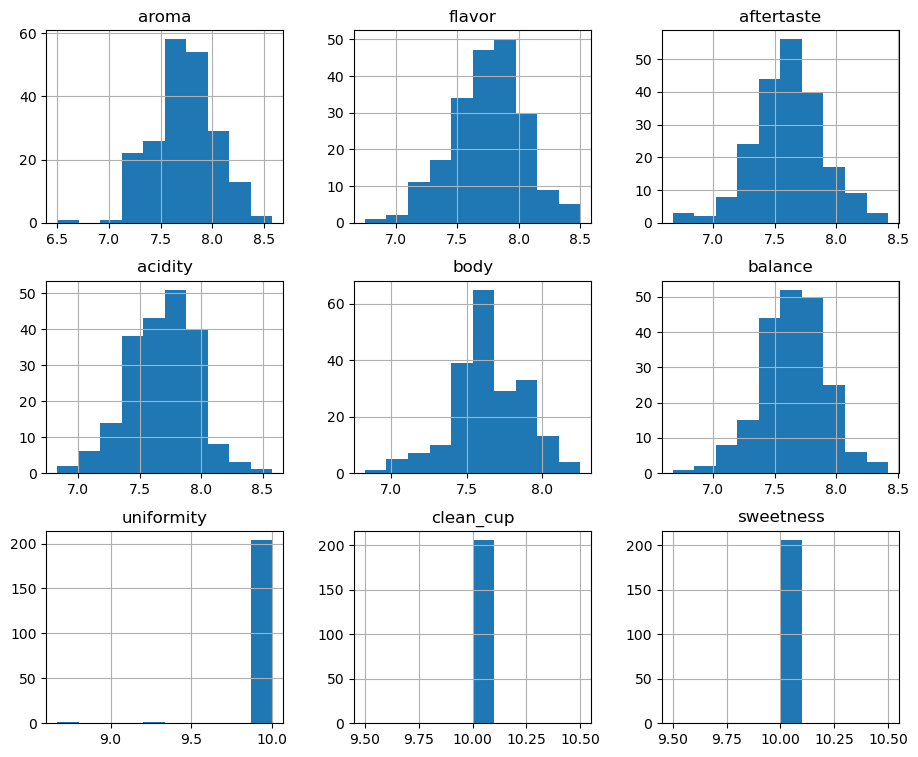

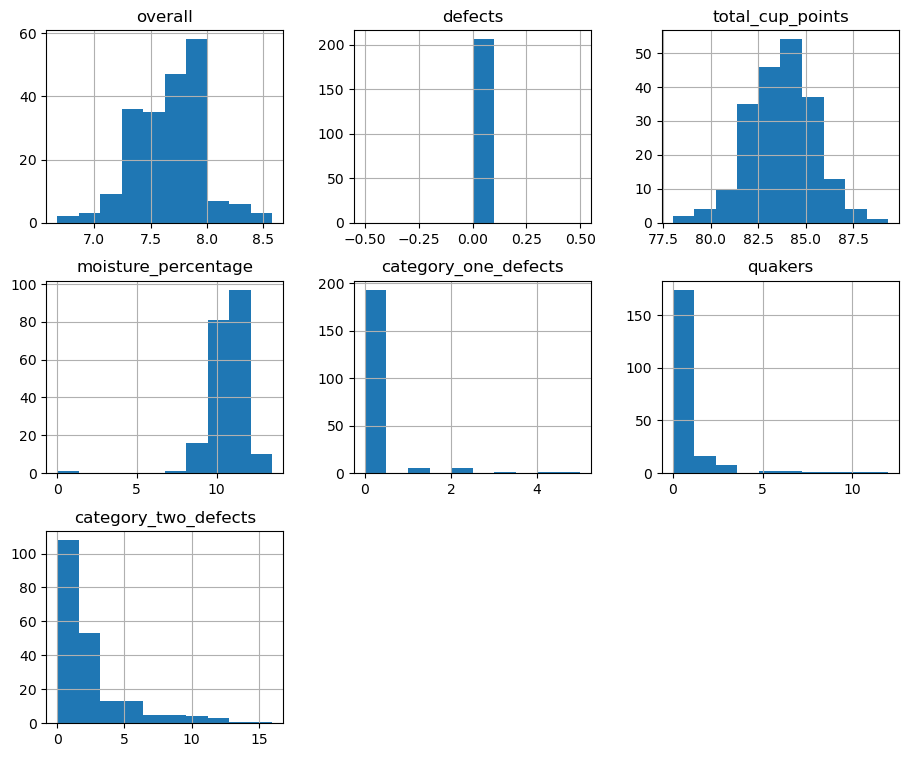

In [364]:
# Plot quick histograms for each quality variable
for i in range(19, 32, 9):
    coffee.iloc[:, i:i+9].hist(figsize=(11, 9))
    plt.tight_layout
    plt.show()

In viewing the initial histograms of each variable, uniformity, clean cup, sweetness, defects, and category one defects all have very little spread. All cups appear to have scored on the extreme ends of the scales for these variables, and for this reason, these variables will not be further analyzed. Variables that are fairly normally distributed and will be further visualized are aroma, flavor, aftertaste, acidity, body, balance, overall, total_cup_ponts, and moisture percentage. Category two defects is left-skewed, but given its reasonable variation, will be left in the analysis.

## Multivariate Visualizations